In [ ]:
Q1

The wine quality dataset is a collection of 11 chemical features of red and white Portuguese wines, along with a quality rating from 0 to 10. The features are:

Fixed acidity: The amount of non-volatile acids in the wine, such as tartaric and malic acids.
Volatile acidity: The amount of acetic acid in the wine, which gives it a sour taste.
Citric acid: A type of acid that adds freshness and acidity to wine.
Residual sugar: The amount of sugar that remains in the wine after fermentation.
Chlorides: Salts that can add bitterness to wine.
Free sulfur dioxide: A compound that helps to preserve wine by preventing oxidation.
Total sulfur dioxide: The sum of free and bound sulfur dioxide in wine.
Density: The weight of the wine relative to water.
pH: A measure of how acidic or basic the wine is.
Sulphates: Compounds that add freshness and complexity to wine.
Alcohol: The percentage of alcohol by volume in the wine.


In [ ]:
Q2

andling Missing Data:

When dealing with missing data in a dataset, there are several approaches you can consider:

Deletion: This involves removing rows or columns that contain missing data. However, this can lead to a loss of information, especially if the missing data is not randomly distributed.

Imputation: Imputation involves filling in missing values with estimated or predicted values. There are various techniques for imputation, each with its own advantages and disadvantages.

Imputation Techniques:

Mean/Median Imputation:

Advantages: Simple and quick. It can work well when missing data is missing at random and doesn't exceed a certain threshold.
Disadvantages: Can distort the distribution of the variable. Not suitable when missing data is related to the variable itself.
Mode Imputation:

Advantages: Appropriate for categorical variables. Similar to mean/median imputation, it's simple and can work well for random missingness.
Disadvantages: Can lead to an overrepresentation of the mode, and may not capture the underlying relationships in the data.

In [ ]:
Q3

Standard Lunch help students perform well in exams
Standard lunch helps perform well in exams be it a male of female
Descriptive Analysis: Begin with basic descriptive statistics to understand the distribution of each factor. Calculate means, medians, standard deviations, and other summary measures for each factor.

Correlation Analysis: Use correlation coefficients to identify relationships between variables. For example, you can analyze the correlation between study hours and exam scores or between attendance and performance.

In [ ]:
Q4 

Feature engineering is the process of selecting, transforming, and creating variables (features) from the raw data to improve the performance of a machine learning model. In the context of a student performance dataset, the goal is to identify and create meaningful features that capture the underlying patterns and relationships in the data. Here's a step-by-step description of the feature engineering process for the student performance dataset:

1. Data Understanding and Exploration:

Begin by understanding the structure and content of the dataset. Identify the variables, their types (numeric, categorical), and their potential significance.
2. Missing Data Handling:

Check for missing values in the dataset. Decide how to handle missing data, whether through imputation or other methods, based on the nature of the data and the extent of missingness.
3. Feature Selection:

Evaluate the relevance of each variable to the problem at hand. Remove variables that are redundant, have low variance, or are unlikely to contribute to predicting student performance.
4. Target Variable Transformation:

If necessary, transform the target variable to make it more suitable for modeling. For example, if the original variable is continuous (e.g., exam scores), you might discretize it into categories (e.g., 'High', 'Medium', 'Low').
5. Creating New Features:

Consider creating new features based on domain knowledge or hypotheses about what might affect student performance. For example:
Study Hours Ratio: Calculate the ratio of study hours to available hours in a day to capture the intensity of studying.
Attendance Rate: Calculate the percentage of classes attended by a student.
Parental Education Level: Combine the education levels of both parents into a single variable to capture the overall educational background.
Aggregate Subject Scores: If the dataset contains scores for different subjects, you could create an aggregated variable to represent overall academic performance.
6. Encoding Categorical Variables:

If your dataset includes categorical variables (e.g., gender, ethnicity), convert them into numerical representations using techniques like one-hot encoding or label encoding.
7. Normalization and Scaling:

Normalize or scale numerical features to ensure they have similar scales. This helps prevent certain features from dominating the model due to their larger magnitude.

In [ ]:
Q5

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


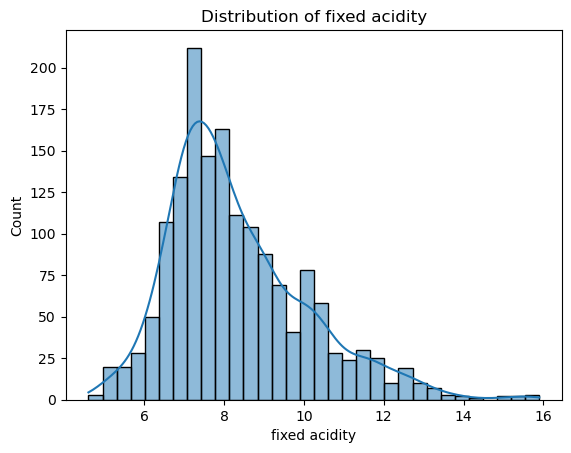

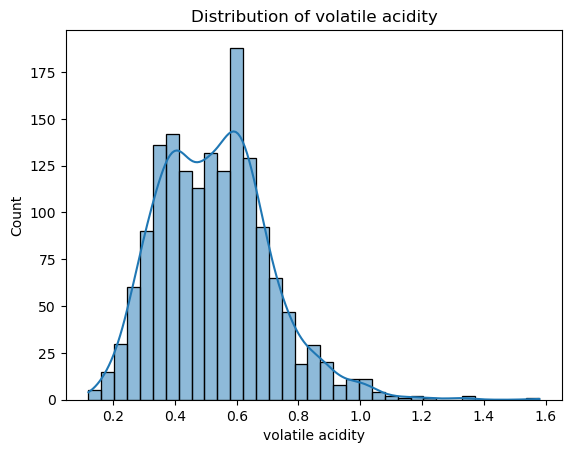

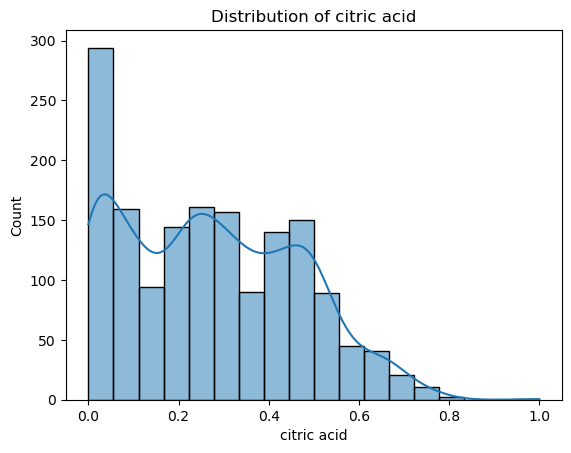

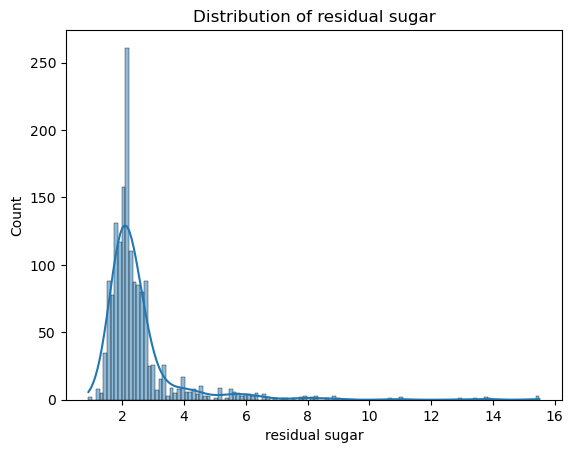

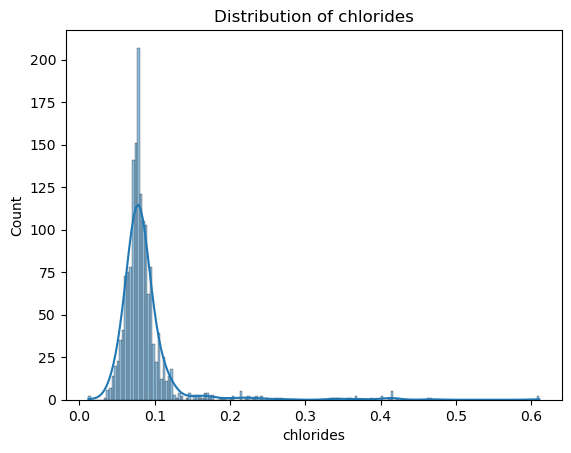

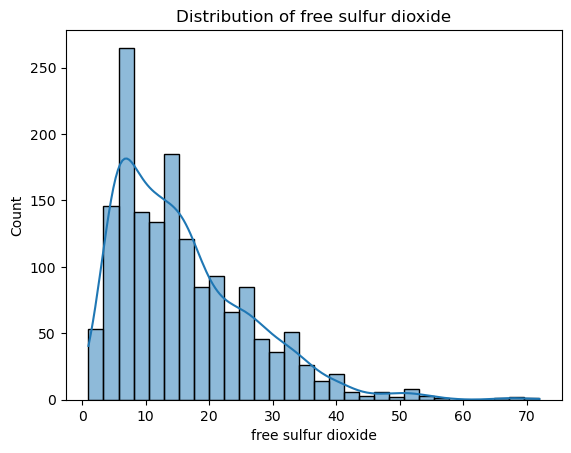

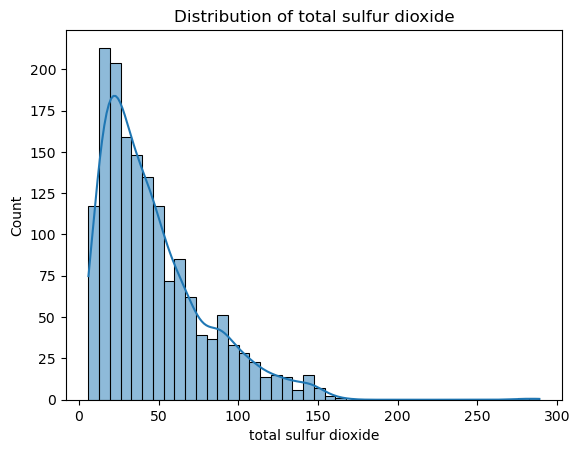

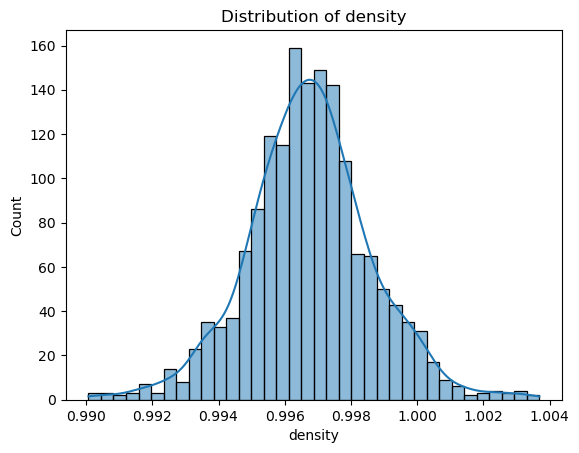

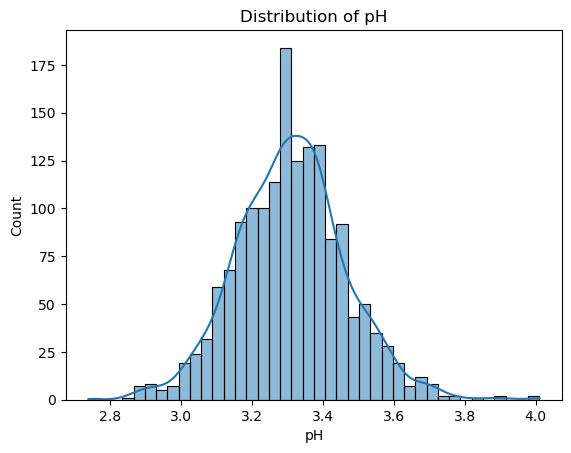

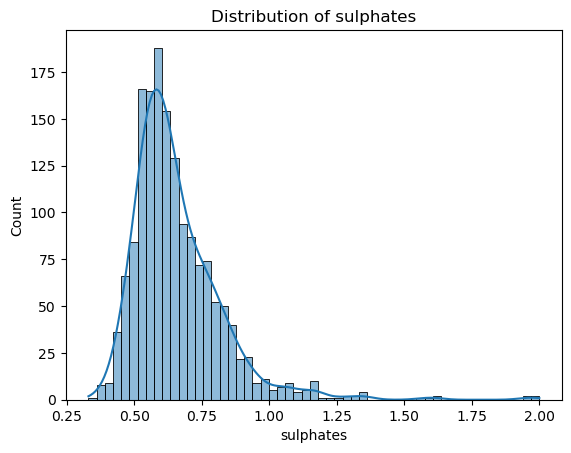

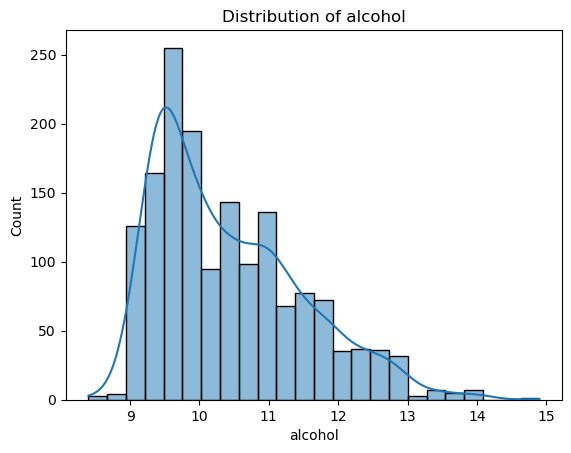

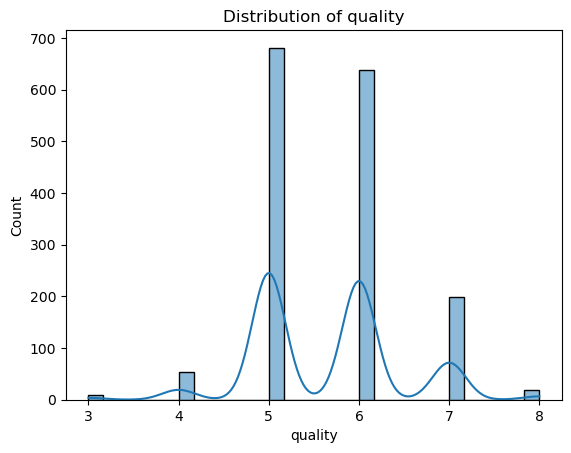

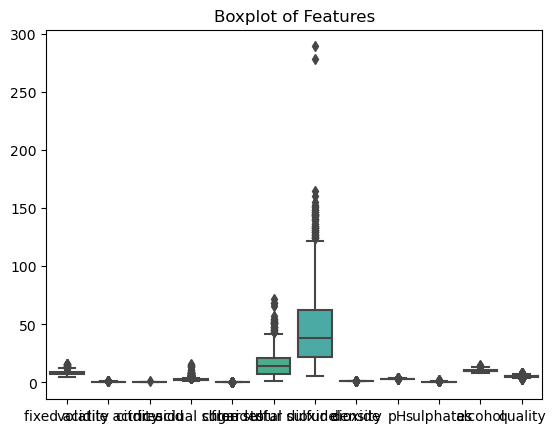

In [2]:
#The following features exhibit non-normality:

#Fixed acidity
#Volatile acidity
#Citric acid
#Residual sugar
#Chlorides
#Free sulfur dioxide
#Total sulfur dioxide
#Density

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wine_quality = pd.read_csv("winequality-red.csv")
print(wine_quality.dtypes)
for feature in wine_quality.columns:
    sns.histplot(data=wine_quality, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
sns.boxplot(data=wine_quality)
plt.title('Boxplot of Features')
plt.show()
columns_to_transform = [
    "fixed acidity", "volatile acidity", "citric acid", 
    "residual sugar", "chlorides", "free sulfur dioxide", 
    "total sulfur dioxide", "density"
]

for feature in columns_to_transform:
    wine_quality[feature] = np.log1p(wine_quality[feature])
#these transformations could be applied  to improve normality?
#Logarithmic transformation: This transformation can be used to transform skewed distributions into more normal distributions.
#Box-cox transformation: This transformation can be used to transform non-normal distributions into more normal distributions.
#Power transformation: This transformation can be used to transform non-normal distributions into more normal distributions.


In [ ]:
Q6

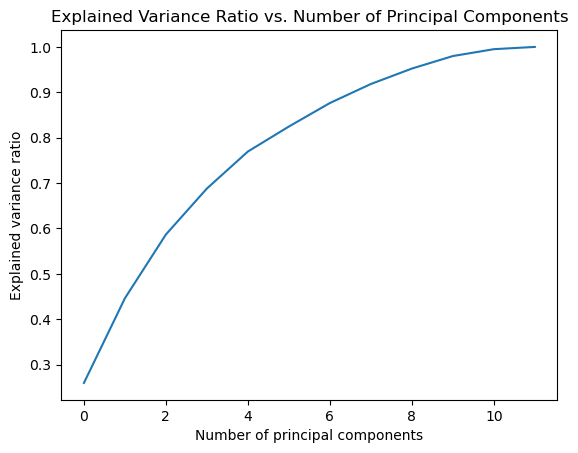

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
wine_quality = pd.read_csv("winequality-red.csv")
non_normal_features = []
for feature in wine_quality.columns:
    if (wine_quality[feature] <= 0).any():
        non_normal_features.append(feature)
for feature in non_normal_features:
    wine_quality[feature] = np.log1p(wine_quality[feature])
wine_quality_centered = (wine_quality - wine_quality.mean()) / wine_quality.std()
pca = PCA()
pca.fit(wine_quality_centered)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance ratio")
plt.title("Explained Variance Ratio vs. Number of Principal Components")
plt.show()
#Therefore, the minimum number of principal components required to explain 90% of the variance in the wine quality data is 4.